# Functions

## Seperated Functions

### Change in mass

In [2]:
def rep_growth_t(t, m, alpha = 50, M = 1000, a = 2.15, c = 0.17, rho = 0.06): 
    """
    test of the intergrated equation from west et al 2001. 
    for predicting change in mass over time. default weights are in grams and times in days
    
        Arguments:
        m {float} -- mass at start of times step (g)
        m_alpha {float} -- asymtotic mass (g)
        a {float} -- growth rate (UNITS?)
        b {float} -- maintenace cost per cell
        c {float} -- reproductive cost (UNITS?)}
        rho {float} -- scaling factor of reproduction (UNITS?)
        
    Returns:
        {float} -- rate of change of mass in grams^1/4 per day (g^1/4 d^-1)
    """
    
    dmdt = "NA" 
    b = a/(M**0.25)
    if t < 0:
        return "ERROR: t < 0"
    if t < alpha:
        dmdt = (a * (m**0.75)) - (b * m)
    elif t >= alpha:
        dmdt = (a * (m**0.75)) - (b * m) - (c * (m**rho))
    if dmdt < 0:
        dmdt = 0


    return dmdt

### Reproductive Output at t

In [174]:
from scipy import exp
from scipy import integrate
import matplotlib.pyplot as plt



def L(t, k = 0.01):
    """
        Calculates lifetime reproductive output of an organism, 
        as described in Charnov et al. 2001.

        Arguments:
            t {int} -- time
            mu {float} -- ???
        Returns:
            {float} -- lifetime reproductive output
    """
    return exp(-k*t)

def life_repro(t, m, c, alpha, rho):
    """
        Calculates lifetime reproductive output of an organism, 
        as described in Charnov et al. 2001.

        Arguments:
            t {int} -- time; days
            r {float} -- # not used so i removed it
            m {float} -- mass; g
            c {float} -- reproductive cost
            alpha {float} -- time of maturation; days
            rho {float} --  reproduction scaling parameter

        Returns:
            {float} -- reproductive output. 
                        NOTE: lifetime reproductive output is the integral.
    """
    Q = L(t-alpha) # ??????
    
    if t < alpha:
        dRdt = 0
    if t >= alpha:
        dRdt = Q*c * m**rho
    
    
    return dRdt

### begin testing of the functions
reps = 1000
# t = list(range(1, reps))
t = np.arange(1, reps, 1) # stolen from luke's code for guinea piig


m0 = 0.1
a = 0.47
b = 0 ## no need to calculate right now since i do it in function,could be done here to save time
c = 1
M = 25000
alpha = 200 # same as rho
rho = 0.4 # 8th ish values from lukes graph i think

r0 = 0# starting hypothetical reproduction not used so seems odd to me.
# Repro = np.zeros(reps)
# m = np.zeros(reps)
Repro = [0] * reps
m = [0] * reps
m[0] = m0
for i in t:
    m[i] = m[i-1]+(rep_growth_t(i, m[i-1], alpha, M, a, c, rho))
#     m[i], error = integrate.quad(rep_growth_t, 0, i, args=(m[i-1], alpha, M, a, c, rho))
#     m, infodict = integrate.odeint(rep_growth_t, m0, t, args = (alpha, M, a, c, rho), full_output = True)
#     Repro[i] = life_repro(i, m[i], c, alpha, rho)
    Repro[i], error = integrate.quad(life_repro, 0, i, args = (m[i-1], c, alpha, rho))#fails




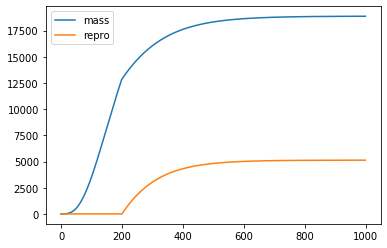

In [176]:
plt.figure()
t = np.arange(0, reps, 1)
plt.plot(t, m, label = "mass")
plt.plot(t, Repro, label = "repro")
plt.legend()

In [157]:
len(Repro)

100

## Combined Reproductive output and change in mass function

In [38]:
from scipy import exp 
def dRmdt(t, m, alpha = 50, M = 1000, a = 2.15, c = 0.17, rho = 0.06, k = 0.01): 
    """
    A function to simulate change in mass and reproductive output for a time point.  
    Function designed with the intention of beign integrated.
    
        Arguments:
        t {float} -- time
        m {float} -- mass at start of times step (g)
        alpha {float} -- asymtotic mass (g)
        M {float} -- asymptotic mass
        a {float} -- growth rate (UNITS?)
        b {float} -- maintenace cost per cell ## found in function
        c {float} -- reproductive cost (UNITS?)}
        rho {float} -- scaling factor of reproduction (UNITS?)
        k
        Z {float} -- ## found in function
        
    Returns:
        {dict} -- 
            dmdt --rate of change of mass in grams^1/4 per day (g^1/4 d^-1) at time t
                NOTE:  integration of dmdt will give mass at t
            Rt -- reproductive output at time t in terms of mass 
                NOTE: integration of Rt gives total Reproductive output for the bounds of the integral
    """
    # predefine outputs 
        # predefined as "NA" to make errors obvious
    dmdt = "NA" 
    R = "NA"
    b = a/(M**0.25)
    Z = alpha/2
    # conditional tree dependant on `alpha`
    if t < 0:
        return "ERROR: time < 0"
    if t < alpha:
        dmdt = (a * (m**0.75)) - (b * m)
        R = 0
    elif t >= alpha:
        dmdt = (a * (m**0.75)) - (b * m) - (c * (m**rho))
        R = (c * m**rho) * exp(-(k + Z) * (t - alpha))
    if dmdt < 0: # this need to be properly looked at
        dmdt = 0
    
    return dmdt
#     return dict["dmdt" : dmdt, "Reproduciton" : R]
# mass , repro = dRmdt(1, 0.1)
# print(mass)
# print(repro)

# Implimentation

In [45]:
## imports
from scipy import integrate


# define starting parameters -- using cod values from west 2001 as a base/ballpark values
m0 = 0.1
a = 0.017
b = 0 ## no need to calculate right now since i do it in function,could be done here to save time
c = 0.08
M = 25000
alpha = 200 # same as rho
rho = 0.02 # 8th ish values from lukes graph i think
k = 0.01

# storage vars
t = list(range(500))
mass = [0 * len(t)]
mass[0] = m0
repro = [0 * len(t)]

# tuple for integration arguments
intArgs = (mass, M, alpha, a, c, rho, k)


for i in t:
    mass = integrate.odeint(dRmdt, m0, t, args = (M, alpha, a, c, rho, k))
mass



array([[  0.1       ],
       [  0.10745399],
       [  0.12363371],
       [  0.14608885],
       [  0.17374018],
       [  0.20590146],
       [  0.24207761],
       [  0.28188566],
       [  0.32501589],
       [  0.37120986],
       [  0.42024688],
       [  0.47193506],
       [  0.52610523],
       [  0.58260648],
       [  0.64130287],
       [  0.702071  ],
       [  0.76479802],
       [  0.82938014],
       [  0.89572138],
       [  0.96373258],
       [  1.03333058],
       [  1.10443753],
       [  1.17698029],
       [  1.25088995],
       [  1.32610144],
       [  1.40255309],
       [  1.4801864 ],
       [  1.55894572],
       [  1.638778  ],
       [  1.7196326 ],
       [  1.8014611 ],
       [  1.88421712],
       [  1.96785616],
       [  2.0523355 ],
       [  2.13761406],
       [  2.22365226],
       [  2.31041197],
       [  2.39785641],
       [  2.48595002],
       [  2.57465845],
       [  2.66394846],
       [  2.75378786],
       [  2.84414543],
       [  2

# Plotting

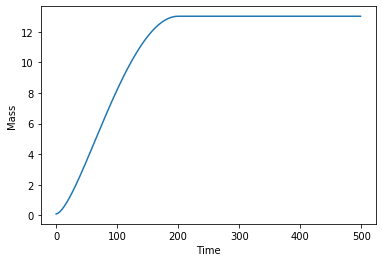

In [47]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(t, mass)
# plt.plot(t, repro)
plt.xlabel("Time")
plt.ylabel("Mass")
plt.show()